## importing important lib

In [89]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')



## problem statement

## data gathering

In [90]:
df=pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [91]:
df.rename({'Cement':'Cement', 'Blast Furnace Slag':'Blast_Furnace_Slag',
           'Fly Ash':'Fly_Ash', 'Water':'Water', 'Superplasticizer':'Superplasticizer',
           'Coarse Aggregate':'Coarse_Aggregate', 'Fine Aggregate':'Fine_Aggregate', 'Age':'Age',
            'Strength':'Strength'},axis=1,inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## EDA

## Cement

In [93]:
df['Cement'].isna().sum()

0

<AxesSubplot: xlabel='Cement', ylabel='Density'>

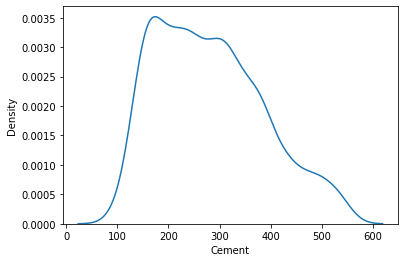

In [94]:
sns.kdeplot(df['Cement'])

<AxesSubplot: >

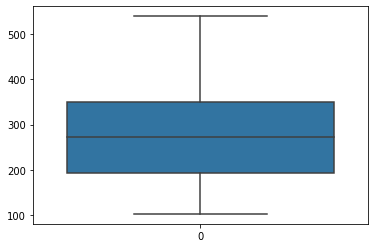

In [95]:
sns.boxplot(df['Cement'])

## Blast Furnace Slag

<AxesSubplot: >

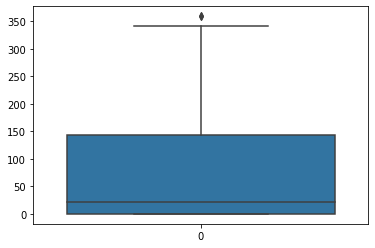

In [96]:
sns.boxplot(df['Blast_Furnace_Slag'])

<AxesSubplot: >

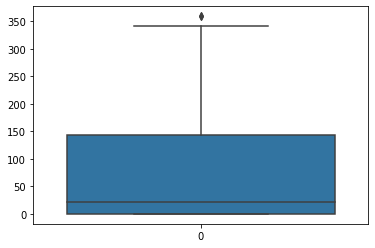

In [97]:
sns.boxplot(df['Blast_Furnace_Slag'])

In [98]:
q1=df['Blast_Furnace_Slag'].quantile(0.25)
q3=df['Blast_Furnace_Slag'].quantile(0.75)
iqr=q3-q1
ut=q3+(1.5*iqr)
df['Blast_Furnace_Slag']=np.where(df['Blast_Furnace_Slag']>ut,ut,df['Blast_Furnace_Slag'])

## Fly Ash

<AxesSubplot: >

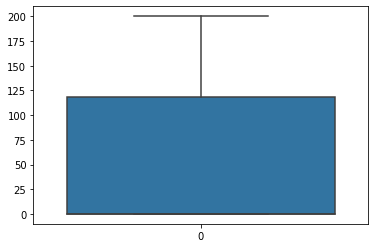

In [99]:
sns.boxplot(df['Fly_Ash'])

<AxesSubplot: xlabel='Fly_Ash', ylabel='Density'>

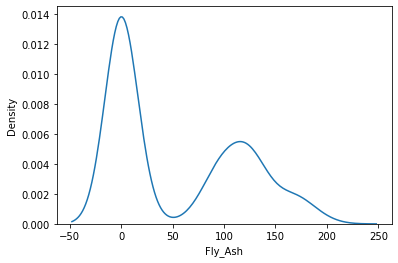

In [100]:
sns.kdeplot(df['Fly_Ash'])

## Water

<AxesSubplot: xlabel='Water', ylabel='Density'>

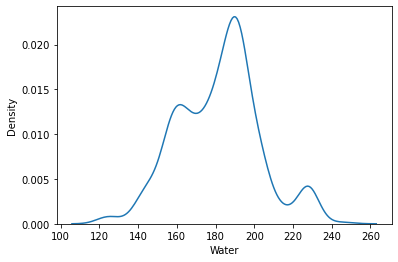

In [101]:
sns.kdeplot(df['Water'])

<AxesSubplot: >

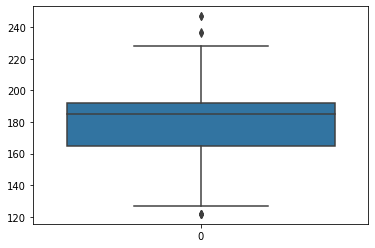

In [102]:
sns.boxplot(df['Water'])

In [103]:
q1=df['Water'].quantile(0.25)
q3=df['Water'].quantile(0.75)
iqr=q3-q1
ut=q3+(1.5*iqr)
lt=q1-(1.5*iqr)
df['Water']=np.where(df['Water']>ut,ut,np.where(df['Water']<lt,lt,df['Water']))

## Superplasticizer

<AxesSubplot: xlabel='Superplasticizer', ylabel='Density'>

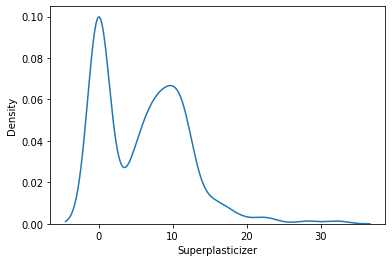

In [104]:
sns.kdeplot(df['Superplasticizer'])

<AxesSubplot: >

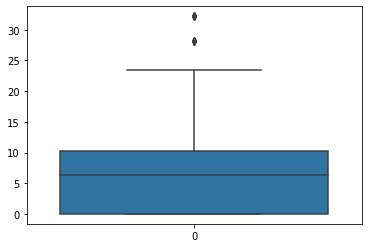

In [105]:
sns.boxplot(df['Superplasticizer'])

In [106]:
q1=df['Superplasticizer'].quantile(0.25)
q3=df['Superplasticizer'].quantile(0.75)
iqr=q3-q1
ut=q3+(1.5*iqr)
df['Superplasticizer']=np.where(df['Superplasticizer']>ut,ut,df['Superplasticizer'])

## Coarse Aggregate

<AxesSubplot: xlabel='Coarse_Aggregate', ylabel='Density'>

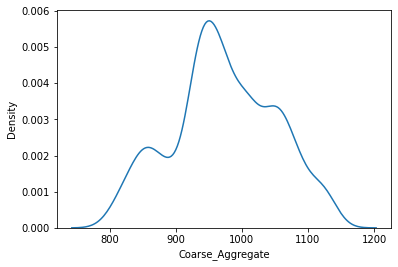

In [107]:
sns.kdeplot(df['Coarse_Aggregate'])

<AxesSubplot: >

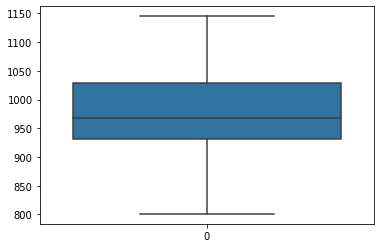

In [108]:
sns.boxplot(df['Coarse_Aggregate'])

## Fine Aggregate

<AxesSubplot: xlabel='Fine_Aggregate', ylabel='Density'>

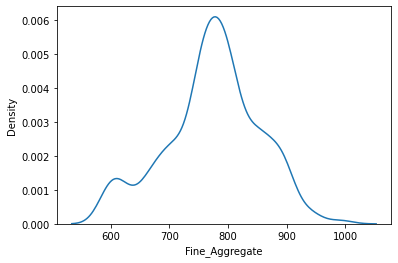

In [109]:
sns.kdeplot(df['Fine_Aggregate'])

<AxesSubplot: >

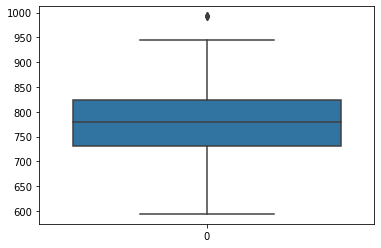

In [110]:
sns.boxplot(df['Fine_Aggregate'])

In [111]:
q1=df['Fine_Aggregate'].quantile(0.25)
q3=df['Fine_Aggregate'].quantile(0.75)
iqr=q3-q1
ut=q3+(1.5*iqr)
df['Fine_Aggregate']=np.where(df['Fine_Aggregate']>ut,ut,df['Fine_Aggregate'])

## Age

<AxesSubplot: xlabel='Age', ylabel='Density'>

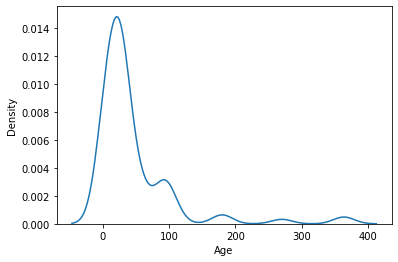

In [112]:
sns.kdeplot(df['Age'])

<AxesSubplot: >

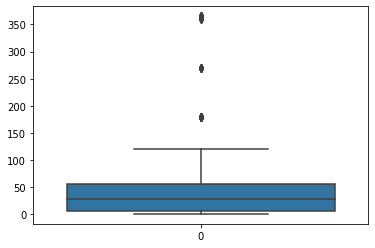

In [113]:
sns.boxplot(df['Age'])

In [114]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
ut=q3+(1.5*iqr)
df['Age']=np.where(df['Age']>ut,ut,df['Age'])

## feature selection

### linerity

In [115]:
df.corr().tail(1)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Strength,0.497832,0.134859,-0.105755,-0.291203,0.366375,-0.164935,-0.169584,0.469625,1.0


In [116]:
df.cov().tail(1)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Strength,869.143022,194.350896,-113.064425,-103.254862,35.514322,-214.239754,-226.118611,280.727335,279.081814


### vif

<AxesSubplot: >

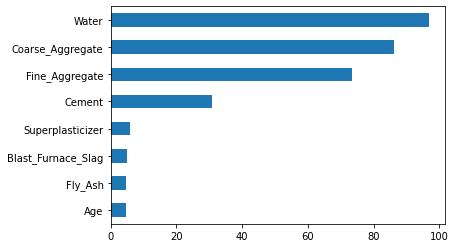

In [117]:
col_list=df.columns
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)

s1=pd.Series(vif_list,index=col_list[:-1])
s1.sort_values().plot(kind='barh')

## model training

## train test split

In [118]:
x=df.drop('Strength',axis=1)
y=df['Strength']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


## linear regg

In [119]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

## evluation

In [120]:
#evaluation on testing data
y_pred=lin_reg.predict(x_test)

# eveluation metrix
mse= mean_squared_error(y_test,y_pred)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)

r2_test=r2_score(y_test,y_pred)
print('r2_score:',r2_test)


mse: 65.4685870327934
rmse: 8.091266095784603
mae: 6.380293221152239
r2_score: 0.7459275997773597


In [121]:
#evaluation on training data
y_pred_train=lin_reg.predict(x_train)

# eveluation metrix
mse= mean_squared_error(y_train,y_pred_train)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('mae:',mae)

r2=r2_score(y_train,y_pred_train)
print('r2_score:',r2)


mse: 78.44103505808745
rmse: 8.856694364043927
mae: 6.882169481853334
r2_score: 0.7238831660964498


### modified r2 score

In [122]:
#adj r2 testing
adj_r2_test = 1-(((1-r2_test)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.iloc[:,:i].shape[1]-1))
print('adj r2 testing',adj_r2_test)
#adj r2 training   
adj_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.iloc[:,:i].shape[1]-1))
print('adj r2 trainig',adj_r2)

adj r2 testing 0.736945242193731
adj r2 trainig 0.7141214598473343


## ridge

In [123]:
ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train)

Ridge()

In [124]:
## evaluation on testing data
y_pred=ridge_reg.predict(x_test)

# eveluation metrix
mse= mean_squared_error(y_test,y_pred)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)

r2_test=r2_score(y_test,y_pred)
print('r2_score:',r2_test)


mse: 65.46864918778532
rmse: 8.091269936653042
mae: 6.380298531713835
r2_score: 0.7459273585644559


In [125]:
y_pred_train=ridge_reg.predict(x_train)

# eveluation metrix
mse= mean_squared_error(y_train,y_pred_train)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('mae:',mae)

r2_test=r2_score(y_train,y_pred_train)
print('r2_score:',r2_test)


mse: 78.44103506354121
rmse: 8.856694364351815
mae: 6.882171058081896
r2_score: 0.7238831660772522


## hyperparameter tuning

In [126]:
ridge_reg = Ridge()
hyperparameter = {'alpha':np.arange(0.01,5,0.01)}
gscv_ridge_model = GridSearchCV(ridge_reg, hyperparameter, cv=5)
gscv_ridge_model.fit(x_train, y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=4.99)

In [127]:
## checking r2 score for alpha = 4.99
ridge_reg = Ridge(4.99)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=4.99)

In [128]:
y_pred=ridge_reg.predict(x_test)

# eveluation metrix
mse= mean_squared_error(y_test,y_pred)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)

r2_test=r2_score(y_test,y_pred)
print('r2_score:',r2_test)


mse: 65.46889716909376
rmse: 8.091285260642698
mae: 6.380319711783689
r2_score: 0.7459263961913682


## lasso

In [129]:
lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train)

Lasso()

In [130]:
#testing data
y_pred=lasso_reg.predict(x_test)

# eveluation metrix
mse= mean_squared_error(y_test,y_pred)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)

r2_test=r2_score(y_test,y_pred)
print('r2_score:',r2_test)

mse: 65.75640262606926
rmse: 8.109032163339178
mae: 6.402411034099463
r2_score: 0.7448106366364189


In [131]:
#training data
y_pred_train=lasso_reg.predict(x_train)

# eveluation metrix
mse= mean_squared_error(y_train,y_pred_train)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('mae:',mae)

r2_test=r2_score(y_train,y_pred_train)
print('r2_score:',r2_test)


mse: 78.50622786779651
rmse: 8.860374025276615
mae: 6.89187403390526
r2_score: 0.7236536837573041


## hyperparameter tuning

In [132]:
lasso_reg_model = Lasso()
hyperparameter = {'alpha':np.arange(0.01,5,0.01)}
gscv_lasso_model = GridSearchCV(lasso_reg_model, hyperparameter, cv=5)
gscv_lasso_model.fit(x_train, y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=4.99)

In [133]:
# lasso with alpha as 4.99 
lasso_reg = Lasso(4.99)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=4.99)

In [134]:
#testing data
y_pred=lasso_reg.predict(x_test)

# eveluation metrix
mse= mean_squared_error(y_test,y_pred)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)

r2_test=r2_score(y_test,y_pred)
print('r2_score:',r2_test)

mse: 66.91393720105764
rmse: 8.1800939604052
mae: 6.482048526376456
r2_score: 0.7403184427288174


In [135]:
#training data
y_pred_train=lasso_reg.predict(x_train)

# eveluation metrix
mse= mean_squared_error(y_train,y_pred_train)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('mae:',mae)

r2_test=r2_score(y_train,y_pred_train)
print('r2_score:',r2_test)


mse: 79.20673934664141
rmse: 8.899816815341842
mae: 6.938736482970109
r2_score: 0.7211878441427642


## testing on user input

In [136]:
x_train.head(1).T

,995
Cement,158.6
Blast_Furnace_Slag,148.9
Fly_Ash,116.0
Water,175.1
Superplasticizer,15.0
Coarse_Aggregate,953.3
Fine_Aggregate,719.7
Age,28.0


In [137]:
x.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [138]:
def predict_strength(Cement, Blast_Furnace_Slag, Fly_Ash, Water, Superplasticizer,
       Coarse_Aggregate, Fine_Aggregate, Age):
    col_list = x.columns
    test = np.zeros(len(x.columns))
    test[0] = Cement
    test[1] = Blast_Furnace_Slag
    test[2] = Fly_Ash
    test[3] = Water
    test[4] = Superplasticizer
    test[5] = Coarse_Aggregate
    test[6] = Fine_Aggregate
    test[7] = Age

    return lin_reg.predict([test])[0]

In [139]:
predict_strength(158.6,148.9,116.0,175.1,15.0,953.3,719.7,28.0)

33.700126811613366

## creating pickel and json file

In [141]:
import pickle as pkl
import json

In [142]:
with open('linear_reg.pkl','wb') as f:
    pkl.dump(lin_reg,f)

In [148]:
data=x.columns.to_list()
proj_data={'columns':data}
with open('project_data.json','w') as f:
    json.dump(proj_data,f)